In [1]:
import pandas as pd
import scipy.stats
temp_df = pd.read_excel('temperature_provisional_clean.xlsx')

In [2]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16677 entries, 0 to 16676
Data columns (total 12 columns):
country          16677 non-null object
lat              16677 non-null float64
long             16677 non-null float64
date             16677 non-null object
cases            16677 non-null int64
fatalities       16677 non-null int64
capital          16677 non-null object
humidity         16500 non-null float64
sunHour          16500 non-null float64
tempC            16500 non-null float64
windspeedKmph    16500 non-null float64
death_rate       16677 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.5+ MB


In [3]:
temp_df.head()

,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph,death_rate
0,afghanistan,33.0,65.0,1/22/2020,0,0,Kabul,65.0,8.7,-1.0,8.0,0.0
1,afghanistan,33.0,65.0,1/23/2020,0,0,Kabul,59.0,8.7,-3.0,8.0,0.0
2,afghanistan,33.0,65.0,1/24/2020,0,0,Kabul,71.0,7.1,0.0,7.0,0.0
3,afghanistan,33.0,65.0,1/25/2020,0,0,Kabul,79.0,8.7,0.0,7.0,0.0
4,afghanistan,33.0,65.0,1/26/2020,0,0,Kabul,64.0,8.7,-1.0,8.0,0.0


to identify an approxiate correlation between temperature and death rate, we have identified those time period who has minimum of 1 death in each of the countries

In [4]:
country_df = temp_df[temp_df['country']=='australia'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_model

,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph,death_rate
839,australia,-31.9505,115.8605,3/1/2020,2,1,Canberra,53.0,11.6,29.0,9.0,50.000000
848,australia,-31.9505,115.8605,3/2/2020,2,1,Canberra,42.0,11.6,30.0,11.0,50.000000
857,australia,-31.9505,115.8605,3/3/2020,2,1,Canberra,72.0,10.3,22.0,11.0,50.000000
860,australia,-33.8688,151.2093,3/4/2020,22,1,Canberra,94.0,6.4,16.0,9.0,4.545455
866,australia,-31.9505,115.8605,3/4/2020,2,1,Canberra,94.0,6.4,16.0,9.0,50.000000
869,australia,-33.8688,151.2093,3/5/2020,22,1,Canberra,96.0,6.4,17.0,9.0,4.545455
875,australia,-31.9505,115.8605,3/5/2020,3,1,Canberra,96.0,6.4,17.0,9.0,33.333333
878,australia,-33.8688,151.2093,3/6/2020,26,1,Canberra,83.0,6.4,24.0,7.0,3.846154
884,australia,-31.9505,115.8605,3/6/2020,3,1,Canberra,83.0,6.4,24.0,7.0,33.333333
887,australia,-33.8688,151.2093,3/7/2020,28,1,Canberra,76.0,7.7,21.0,9.0,3.571429


CORRELATION OF DEATH RATE WITH TEMP IN AUSTRALIA

In [5]:
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']

In [6]:
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

0.04937512138916132

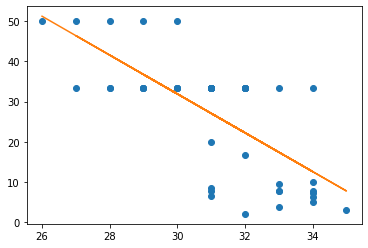

In [31]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN AUSTRALIA

In [8]:
country_df = temp_df[temp_df['country']=='china'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.04254528037052839

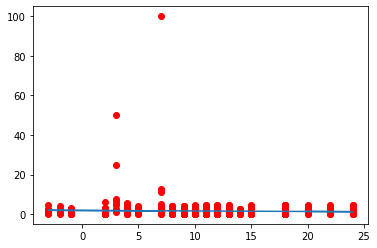

In [9]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(indv_temp, indv_mort, 'ro')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN FRANCE

In [10]:
country_df = temp_df[temp_df['country']=='france'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.08838967201019811

CORRELATION OF DEATH RATE WITH TEMP IN ITALY

In [11]:
country_df = temp_df[temp_df['country']=='italy'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

0.6944483723868662

CORRELATION OF DEATH RATE WITH TEMP IN GERMANY

In [12]:
country_df = temp_df[temp_df['country']=='germany'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.12534491755079324

CORRELATION OF DEATH RATE WITH TEMP IN IRAN

In [13]:
country_df = temp_df[temp_df['country']=='iran'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.3936090684875237

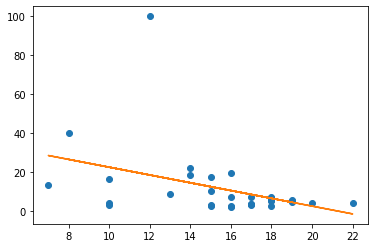

In [14]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN IRAQ

In [15]:
country_df = temp_df[temp_df['country']=='iraq'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

0.5788054287755247

CORRELATION OF DEATH RATE WITH TEMP IN PAKISTAN

In [16]:
country_df = temp_df[temp_df['country']=='pakistan'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

0.33068877993875667

CORRELATION OF DEATH RATE WITH TEMP IN UNITED STATES

In [17]:
country_df = temp_df[temp_df['country']=='usa'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.12933254976732775

CORRELATION OF DEATH RATE WITH TEMP IN DENMARK

In [18]:
country_df = temp_df[temp_df['country']=='denmark'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.11722165206974783

CORRELATION OF DEATH RATE WITH TEMP IN SWEDEN

In [19]:
country_df = temp_df[temp_df['country']=='sweden'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

0.08722155329219378

CORRELATION OF DEATH RATE WITH TEMP IN MEXICO

In [20]:
country_df = temp_df[temp_df['country']=='mexico'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.9883974006031484

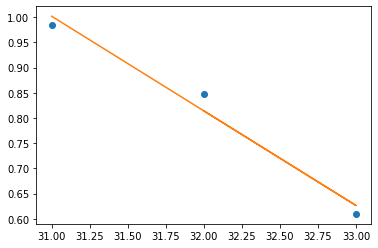

In [21]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN BRAZIL

In [22]:
country_df = temp_df[temp_df['country']=='brazil'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.19786342764588216

CORRELATION OF DEATH RATE WITH TEMP IN TURKEY

In [23]:
country_df = temp_df[temp_df['country']=='turkey'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.26863929333902087

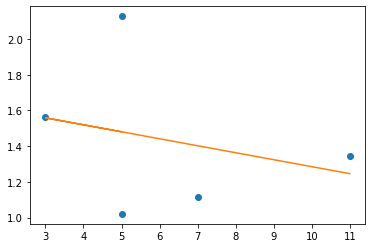

In [24]:
plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN EGYPT

In [25]:
country_df = temp_df[temp_df['country']=='egypt'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.6126057736675262

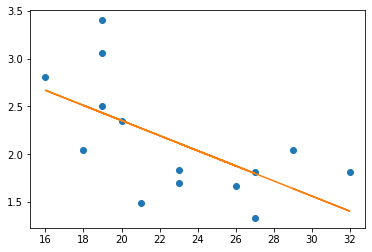

In [26]:
plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN INDONESIA

In [27]:
country_df = temp_df[temp_df['country']=='indonesia'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.3601516687871328

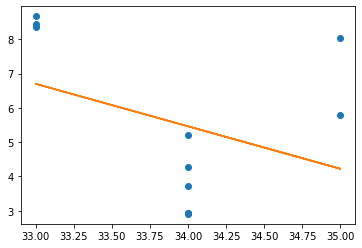

In [28]:
plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()

CORRELATION OF DEATH RATE WITH TEMP IN PHILIPPINES

In [29]:
country_df = temp_df[temp_df['country']=='philippines'] 
indv_model = country_df[country_df['death_rate'] != 0]
indv_temp = indv_model['tempC']
indv_mort = indv_model['death_rate']
scipy.stats.pearsonr(indv_temp, indv_mort)[0]

-0.7022498214692349

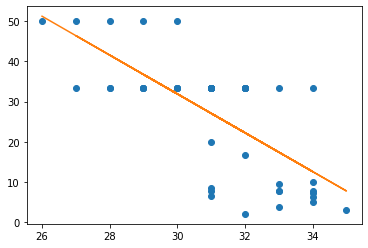

In [30]:
plt.plot(indv_temp, indv_mort, 'o')

m, b = np.polyfit(indv_temp, indv_mort, 1)

plt.plot(indv_temp, m*indv_temp + b)
plt.show()